# Preprocessing of the *Lysekil* data

To summarize the notebook, the initial cleaning of the *Lysekil* data was performed. The notebook contains several cells that perform various tasks such as loading the data, basic preprocessing, removal of highly correlated data, renaming columns, and reordering the columns.

In [1]:
import sys
sys.path.append("../scripts")

import os
import pandas as pd
import load_data, preprocessing, visualize
import plotly.graph_objects as go
import numpy as np

# Set Pandas display options to show all columns
pd.set_option('display.max_columns', None)

## Loading data and initial cleaning

In [2]:
# Load data and use basic preprocessing
raw_df = load_data.lysekil()
df = preprocessing.initial_clean(raw_df)

# Print info and generate overview
visualize.print_df_info(df)
visualize.generate_overview(df)

Size of the DataFrame: 21894
Number of rows without NaN values: 21894
Number of rows without negative values: 21894


Time  Downstream-Rich-FT1042  Downstream-Rich-AT1060  \
NaN count     0.0                    0.00                    0.00   
Valid count   NaN                21894.00                21894.00   
mean          NaN                    1.83                 1095.49   
std           NaN                    0.32                    6.17   
min           NaN                    0.07                 1041.67   
25%           NaN                    1.64                 1090.60   
50%           NaN                    1.81                 1095.37   
75%           NaN                    2.07                 1099.68   
max           NaN                    2.56                 1114.45   

             Downstream-Rich-TT1043  Upstream-Rich-TT1027  \
NaN count                      0.00                  0.00   
Valid count                21894.00              21894.00   
mean                          46.93                106.81   
std                            3.15                  1.96   
min                           23.37                 71.64   
25%                           44.94                105.99   
50%                           46.49                106.55   
75%                           48.35                108.12   
max                           61.03                112.46   

             Upstream-Rich-PST1025  Desorber-Overhead-FT1067  \
NaN count                     0.00                      0.00   
Valid count               21894.00                  21894.00   
mean                          1.44                    103.84   
std                           0.10                      9.11   
min                           0.84                      2.17   
25%                           1.43                    100.71   
50%                           1.45                    104.33   
75%                           1.49                    108.29   
max                           2.24                    134.04   

             Desorber-Overhead-PIC1032  Desorber-Overhead-TIC1062  \
NaN count                         0.00                       0.00   
Valid count                   21894.00                   21894.00   
mean                              0.89                      25.69   
std                               0.08                       6.30   
min                               0.29                      11.35   
25%                               0.90                      18.89   
50%                               0.90                      29.50   
75%                               0.90                      30.17   
max                               1.50                      46.28   

             Desorber-Overhead-Corrected  Desorber-Packing-PT1004  \
NaN count                           0.00                     0.00   
Valid count                     21894.00                 21894.00   
mean                              117.63                     0.88   
std                                 9.79                     0.08   
min                                 2.56                     0.29   
25%                               114.12                     0.90   
50%                               118.16                     0.90   
75%                               123.31                     0.90   
max                               146.72                     1.50   

             Desorber-Packing-TT1004  Desorber-Packing-PT1005  \
NaN count                       0.00                     0.00   
Valid count                 21894.00                 21894.00   
mean                           93.53                     0.88   
std                             3.71                     0.08   
min                            14.84                     0.29   
25%                            92.29                     0.90   
50%                            93.72                     0.90   
75%                            95.11                     0.90   
max                           113.58                     1.50   

             Desorber-Packing-TT1005 

## Removal of highly correlated data

In [3]:
corr_cols = []
pearson = df.iloc[:, 1:].corr(method="pearson")
visualize.make_heatmap(pearson)

Looking at the heatmap above, we can determine some correlations:
* Desorber-Sump-UX1029 and Desorber-Sump-Corrected are highly correlated, we
  will therefore remove Desorber-Sump-UX1029 due to domain knowledge
* Desorber-Overhead-FT1067 and Desorber-Overhead-Corrected are highly 
  correlated, we will therefore remove Desorber-Overhead-FT1067 due to domain 
  knowledge
* Desorber-Sump-TIC1029 and Desorber-Sump-Corrected are highly correlated, we 
  will therefore remove Desorber-Sump-TIC1029 due to domain knowledge

In [4]:
# Print correlations
visualize.print_corr(df, "Desorber-Sump-UX1029", "Desorber-Sump-Corrected")
corr_cols.append("Desorber-Sump-UX1029")

visualize.print_corr(df, "Desorber-Overhead-FT1067", "Desorber-Overhead-Corrected")
corr_cols.append("Desorber-Overhead-FT1067")

visualize.print_corr(df, "Desorber-Sump-TIC1029", "Desorber-Sump-Corrected")
corr_cols.append("Desorber-Sump-TIC1029")


The correlation between the following columns
---------------------------------------------
Desorber-Sump-UX1029
Desorber-Sump-Corrected
ρ = 0.98
---------------------------------------------

The correlation between the following columns
---------------------------------------------
Desorber-Overhead-FT1067
Desorber-Overhead-Corrected
ρ = 0.93
---------------------------------------------

The correlation between the following columns
---------------------------------------------
Desorber-Sump-TIC1029
Desorber-Sump-Corrected
ρ = 0.99
---------------------------------------------


## Renaming columns and reordering
We will now reorder the columns so that they are sorted according to the PFD of the process.

In [5]:
# Remove highly correlated columns
drop_df = df.drop(corr_cols, axis=1)

# Rename columns
new_cols = ["F1", "D1", "T1",
            "T2", "P2",
            "P10", "T10", "F10",
            "P3", "T3",
            "P4", "T4",
            "T5", 
            "P6",
            "T7", "U7",
            "T8", "F8", "D8",
            "T9"]
old_cols = drop_df.columns.values[1:]

column_mapping = {old_col: new_col for old_col, new_col in zip(old_cols, new_cols)}
drop_df.rename(columns=column_mapping, inplace=True)

# Reordering of columns
order_cols = ["Time",
              "F1", "D1", "T1",
              "P2", "T2",
              "P3", "T3",
              "P4", "T4",
              "T5", 
              "P6",
              "T7", "U7",
              "F8", "D8", "T8", 
              "T9",
              "F10", "P10", "T10"]

new_df = drop_df[order_cols]
visualize.generate_overview(new_df)

Time        F1        D1        T1        P2        T2        P3  \
NaN count     0.0      0.00      0.00      0.00      0.00      0.00      0.00   
Valid count   NaN  21894.00  21894.00  21894.00  21894.00  21894.00  21894.00   
mean          NaN      1.83   1095.49     46.93      1.44    106.81      0.88   
std           NaN      0.32      6.17      3.15      0.10      1.96      0.08   
min           NaN      0.07   1041.67     23.37      0.84     71.64      0.29   
25%           NaN      1.64   1090.60     44.94      1.43    105.99      0.90   
50%           NaN      1.81   1095.37     46.49      1.45    106.55      0.90   
75%           NaN      2.07   1099.68     48.35      1.49    108.12      0.90   
max           NaN      2.56   1114.45     61.03      2.24    112.46      1.50   

                   T3        P4        T4        T5        P6        T7  \
NaN count        0.00      0.00      0.00      0.00      0.00      0.00   
Valid count  21894.00  21894.00  21894.00  21894.00  21894.00  21894.00   
mean            93.53      0.88    101.92    104.21      0.89    119.22   
std              3.71      0.08      1.95      3.55      0.08      1.76   
min             14.84      0.29     51.80     69.27      0.29     81.41   
25%             92.29      0.90    101.34    102.67      0.90    118.96   
50%             93.72      0.90    101.92    103.72      0.90    119.86   
75%             95.11      0.90    102.79    105.82      0.90    120.01   
max            113.58      1.50    116.80    118.53      1.50    127.56   

                   U7        F8        D8        T8        T9       F10  \
NaN count        0.00      0.00      0.00      0.00      0.00      0.00   
Valid count  21894.00  21894.00  21894.00  21894.00  21894.00  21894.00   
mean           125.09      2.13   1027.80    117.40     71.37    117.63   
std              9.52      0.27      7.39      1.59      5.36      9.79   
min              2.27      0.36   1009.22     92.46     30.04      2.56   
25%            120.24      1.98   1023.00    117.28     69.02    114.12   
50%            124.98      2.07   1027.15    117.74     72.46    118.16   
75%            131.77      2.31   1033.10    118.06     75.24    123.31   
max            140.55      2.93   1093.20    125.38    100.08    146.72   

                  P10       T10  
NaN count        0.00      0.00  
Valid count  21894.00  21894.00  
mean             0.89     25.69  
std              0.08      6.30  
min              0.29     11.35  
25%              0.90     18.89  
50%              0.90     29.50  
75%              0.90     30.17  
max              1.50     46.28

## Correction of F10

Due to the nature of the condensation process, the $F10$ stream will contain small amounts of water. It is therefore crucial to identify how much this influences the stream and then adjust the value such that it is mostly $CO_2$.

In [6]:
fig = go.Figure(data=go.Scatter(x=new_df["T10"], y=new_df["P6"], mode='markers'))
fig.update_layout(title="Desorber pressure plotted against condenser temperature", xaxis_title="T10 [°C]", yaxis_title="P6 [barg]")
fig.show()

From the above plot, we can observe 3 distinct pressures and a temperature range of the condenser. This can be used to calculate the moisture content in the $F10$ stream. In order to calculate the moisture content of the $CO_2$ outlet stream, we can utilize the vapor pressure of water as the following Equation from Daltons Law:

\begin{equation*}
    P_{tot} = P_{CO_2} + P_{H_2O}
\end{equation*}

where 

\begin{equation*}
    P_{H_2O} = f(T)
\end{equation*}

which can be found in thermodynamical data sheets. In order to calculate the molar composition, we can use Raoults law:

\begin{align*}
    P_{CO_2}  &= x_{CO_2} P_{tot} \\
    \\
    x_{CO_2} &= \frac{P_{CO_2}}{P_{tot}}= 1 - \frac{P_{H_2O}}{P_{tot}}
\end{align*}

Since the measurement of the $CO_2$ stream is given in mass, we transform this into mass fraction.

\begin{align*}
    w_{CO_2} &= \frac{m_{CO_2}}{m_{CO_2} + m_{H_2O}} \\
             &= \frac{x_{CO_2}n_{tot}Mm_{CO_2}}{x_{CO_2}n_{tot}Mm_{CO_2} + x_{H_2O}n_{tot}Mm_{H_2O}} \\
             &= \frac{x_{CO_2}Mm_{CO_2}}{x_{CO_2}Mm_{CO_2} + (1 - x_{CO_2})Mm_{H_2O}}
\end{align*}

In [7]:
# Picking some intervals by looking at the dropdown plot
P_tot = np.linspace(0.5, 2, 11) # barg
T = np.array([10, 15, 20, 25, 30, 35, 40, 45]) # °C

# Partial pressure of water vapor in MPa 
# from Perry's Chemical Engineers' Handbook
P_H2O = np.array([0.0012282, 0.0017058, 0.0023393, 0.0031699, 
                  0.0042470, 0.0056290, 0.0073849, 0.0095950])

CO2_df = visualize.generate_moisture_df(P_tot, T, P_H2O)
CO2_df

10°C   15°C   20°C   25°C   30°C   35°C   40°C   45°C
0.50  0.997  0.995  0.994  0.991  0.988  0.984  0.979  0.973
0.65  0.997  0.996  0.994  0.992  0.989  0.986  0.981  0.975
0.80  0.997  0.996  0.995  0.993  0.990  0.987  0.983  0.977
0.95  0.997  0.996  0.995  0.993  0.991  0.988  0.984  0.979
1.10  0.998  0.997  0.995  0.994  0.992  0.989  0.985  0.981
1.25  0.998  0.997  0.996  0.994  0.992  0.990  0.986  0.982
1.40  0.998  0.997  0.996  0.995  0.993  0.990  0.987  0.983
1.55  0.998  0.997  0.996  0.995  0.993  0.991  0.988  0.984
1.70  0.998  0.997  0.996  0.995  0.993  0.991  0.989  0.985
1.85  0.998  0.998  0.997  0.995  0.994  0.992  0.989  0.986
2.00  0.998  0.998  0.997  0.996  0.994  0.992  0.990  0.987

/Users/junxingli/Desktop/master_thesis/notebooks/../scripts/visualize.py:178: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.



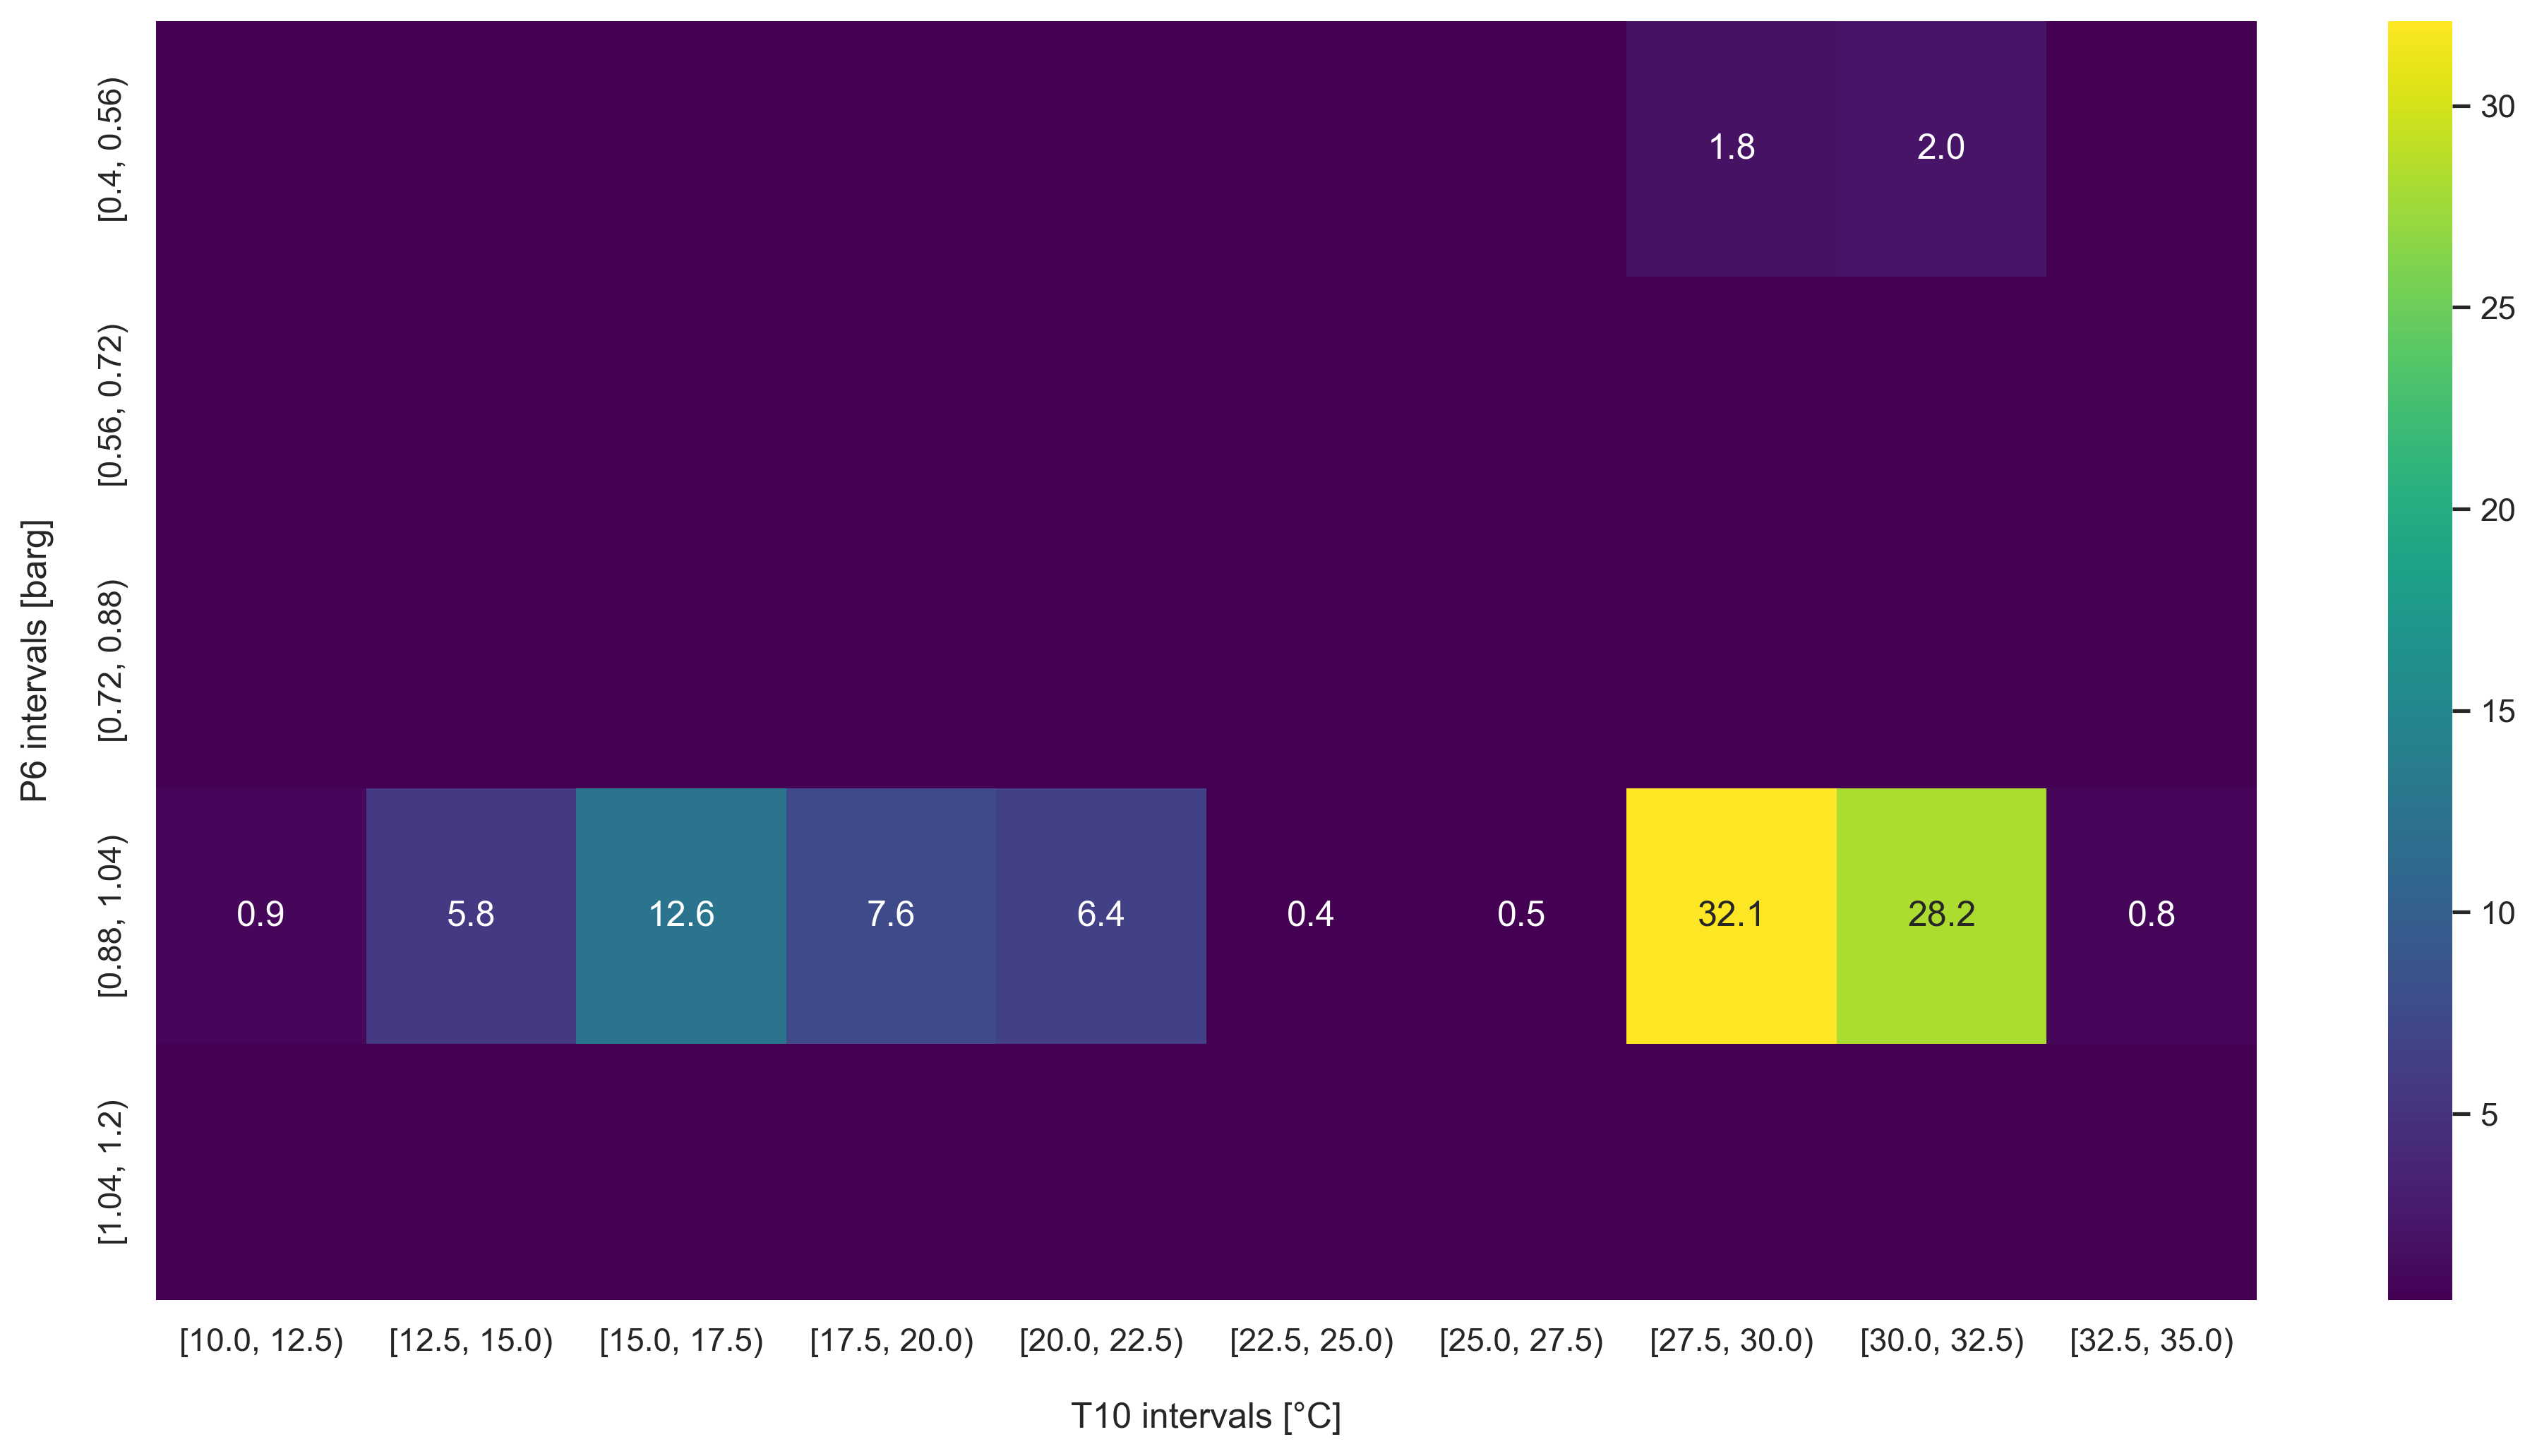

In [8]:
visualize.plot_TP_distribution(new_df)

In [9]:
df_corrected = preprocessing.correct_CO2_flow(new_df, CO2_df)

fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=new_df['Time'], 
        y=df_corrected['F10'], 
        name='Corrected', 
        mode='markers')
    )

fig.add_trace(
    go.Scatter(
        x=new_df['Time'], 
        y=new_df['F10'], 
        name='Uncorrected', 
        mode='markers')
    )

fig.update_layout(title='Correction of F10',
                  xaxis_title='Time',
                  yaxis_title='Mass flow [kg/h]')

fig.show()

## Further removal of highly correlated data

In [10]:
pearson = df_corrected[["P3", "P4", "P6", "P10"]].corr(method="pearson")
print(pearson)

           P3        P4        P6       P10
P3   1.000000  0.999790  0.999803  0.999814
P4   0.999790  1.000000  0.999817  0.999812
P6   0.999803  0.999817  1.000000  0.999889
P10  0.999814  0.999812  0.999889  1.000000


In [11]:
pearson = df_corrected[["T7", "T8"]].corr(method="pearson")
print(pearson)

         T7       T8
T7  1.00000  0.96317
T8  0.96317  1.00000


We observe that a couple of temeprature and pressures are highly correlated and
choose to therefore remove some. $P6$ and $T7$ were kept due to their
interpretability

In [12]:
df_reduced = df_corrected.drop(["P3", "P4", "P10", "T8"], axis=1)

if not os.path.exists("../data/processed/corrected_Lysekil.pkl"):
    df_reduced.to_pickle("../data/processed/corrected_Lysekil.pkl")

## Transient/stationary labels

In [17]:
# Set of global variables, overwrites those from preprocessing.py
stable = ["F1", "D1", "T2", "P6", "T7", "F8", "D8", "T9", "F10", "T10"]
std_limit = [0.1, 10, 1, 0.03, 0.5, 0.1, 10, 0.5, 5, 1]

df_reduced['Time'] = pd.to_datetime(df_reduced['Time'])
df_split, counter = preprocessing.add_stability(df_reduced, 
                                                30, 
                                                stable=stable,
                                                std_limit=std_limit)
counter

{'F1': 1858,
 'T9': 2934,
 'F8': 662,
 'F10': 863,
 'T2': 402,
 'P6': 453,
 'T7': 541,
 'D1': 59,
 'T10': 3022,
 'D8': 69,
 'Counter': [26, 74, 90, 116, 203, 163, 300, 799, 4516, 15607]}

In [18]:
var = "T10"
stable = df_split[df_split["Status"] == "Stable"]
unstable = df_split[df_split["Status"] == "Unstable"]

fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=stable['Time'], 
        y=stable[var], 
        mode='markers', 
        marker=dict(size=2),
        name='Stable',
    )
)

fig.add_trace(
    go.Scatter(
        x=unstable['Time'], 
        y=unstable[var], 
        mode='markers', 
        marker=dict(size=2),
        name='Unstable',
    )
)

fig.show()

## Combine U7 and F10 to SRD

In [19]:
srd_df = df_split.copy()
srd_df["SRD"] = 3.6 * srd_df["U7"] / srd_df["F10"]
srd_df = srd_df.drop(["U7", "F10"], axis=1)

#if not os.path.exists("../data/processed/SRD_Lysekil.pkl"):
srd_df.to_pickle("../data/processed/SRD_Lysekil.pkl")

pearson = srd_df.iloc[:, 1:].corr(method="pearson")
visualize.make_heatmap(pearson)

/var/folders/p2/j2dh2mts4mz6_nskglkx1g9m0000gn/T/ipykernel_25274/1962145562.py:8: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [20]:
srd_df

Time        F1           D1         T1        P2  \
9324  2020-05-20 17:24:00  2.232321  1097.987305  50.102436  1.519665   
9325  2020-05-20 17:25:00  2.233235  1098.083130  50.150478  1.508636   
9326  2020-05-20 17:26:00  2.229944  1098.133423  50.198524  1.523170   
9327  2020-05-20 17:27:00  2.227340  1098.183838  50.246567  1.517410   
9328  2020-05-20 17:28:00  2.229688  1098.157227  50.294613  1.527369   
...                   ...       ...          ...        ...       ...   
49075 2020-06-17 07:55:00  1.884664  1087.911987  45.040844  1.455882   
49076 2020-06-17 07:56:00  1.883721  1087.986328  44.935429  1.460262   
49077 2020-06-17 07:57:00  1.882078  1088.015869  44.880573  1.452804   
49078 2020-06-17 07:58:00  1.888114  1088.045532  44.821346  1.455370   
49079 2020-06-17 07:59:00  1.882400  1088.075073  44.696239  1.454661   

               T2         T3          T4          T5        P6          T7  \
9324   109.524452  93.971924  102.095467  101.332230  0.900599  118.860939   
9325   109.639938  94.001595  102.116783  101.351891  0.900554  118.876534   
9326   109.633644  94.031273  102.138100  101.371559  0.900510  118.892120   
9327   109.657227  94.060951  102.159424  101.391228  0.900465  118.907715   
9328   109.680801  94.090622  102.180740  101.410896  0.900421  118.923309   
...           ...        ...         ...         ...       ...         ...   
49075  105.895790  95.521477  102.522530  107.884224  0.901957  120.023209   
49076  105.821640  95.516327  102.515762  107.934662  0.902298  120.037056   
49077  105.801193  95.511185  102.509003  107.983292  0.902173  120.050903   
49078  105.860657  95.506042  102.502243  107.967041  0.903435  120.064751   
49079  105.799164  95.500893  102.495476  107.991135  0.901869  120.057022   

             F8           D8         T9        T10  Status       SRD  
9324   2.481242  1035.159546  74.866295  17.715805  Stable  3.990925  
9325   2.477294  1035.022461  74.906166  17.711424  Stable  3.918702  
9326   2.480054  1034.953247  74.946030  17.707043  Stable  3.907067  
9327   2.486111  1034.781128  74.985901  17.702663  Stable  3.907439  
9328   2.490096  1034.633667  75.025772  17.698282  Stable  3.941355  
...         ...          ...        ...        ...     ...       ...  
49075  2.075545  1018.463623  73.215927  30.205963  Stable  3.832120  
49076  2.082254  1018.424988  73.124725  29.494471  Stable  3.858959  
49077  2.077249  1018.474121  73.074516  30.517061  Stable  3.833061  
49078  2.074874  1018.457397  73.003899  29.727894  Stable  3.846768  
49079  2.081604  1018.302673  72.936935  30.749924  Stable  3.807927  

[21894 rows x 17 columns]